# DATS369: Machine Learning with Graphs Homework 1
Due: Mar 8 23:59, 2025

# 1. NetworkX Tutorial (5 points)

[NetworkX](https://networkx.org/documentation/stable/) is one of the most frequently used Python packages to create, manipulate, and mine graphs.

Let's see how it works by running the following cells. **Free lunch**: we will give full credits for successful execution. Enjoy and welcome to the graph world!!!

## Setup



In [107]:
# Upgrade packages
%pip install --upgrade scipy networkx

Note: you may need to restart the kernel to use updated packages.


In [108]:
# Import the NetworkX package
import networkx as nx
nx.__version__

'3.4.2'

## Graph

NetworkX provides several classes to store different types of graphs, such as directed and undirected graph. It also provides classes to create multigraphs (both directed and undirected).

For more information, please refer to NetworkX graph types.

In [109]:
# Create an undirected graph G
G = nx.Graph()
print(G.is_directed())

# Create a directed graph H
H = nx.DiGraph()
print(H.is_directed())

# Add graph level attribute
G.graph["Name"] = "Bar"
print(G.graph)

False
True
{'Name': 'Bar'}


## Node
Nodes (with attributes) can be easily added to NetworkX graphs.

In [110]:
# Add one node with node level attributes
G.add_node(0, feature=5, label=0)

# Get attributes of the node 0
node_0_attr = G.nodes[0]
print("Node 0 has the attributes {}".format(node_0_attr))

Node 0 has the attributes {'feature': 5, 'label': 0}


In [111]:
G.nodes(data=True)

NodeDataView({0: {'feature': 5, 'label': 0}})

In [112]:
# Add multiple nodes with attributes
G.add_nodes_from([
  (1, {"feature": 1, "label": 1}),
  (2, {"feature": 2, "label": 2})
]) #(node, attrdict)

# Loop through all the nodes
# Set data=True will return node attributes
for node in G.nodes(data=True):
  print(node)

# Get number of nodes
num_nodes = G.number_of_nodes()
print("G has {} nodes".format(num_nodes))

(0, {'feature': 5, 'label': 0})
(1, {'feature': 1, 'label': 1})
(2, {'feature': 2, 'label': 2})
G has 3 nodes


## Edge
Similar to nodes, edges (with attributes) can also be easily added to NetworkX graphs.

In [113]:
# Add one edge with edge weight 0.5
G.add_edge(0, 1, weight=0.5)

# Get attributes of the edge (0, 1)
edge_0_1_attr = G.edges[(0, 1)]
print("Edge (0, 1) has the attributes {}".format(edge_0_1_attr))

Edge (0, 1) has the attributes {'weight': 0.5}


In [114]:
# Add multiple edges with edge weights
G.add_edges_from([
  (1, 2, {"weight": 0.3}),
  (2, 0, {"weight": 0.1})
])

# Loop through all the edges
# Here there is no data=True, so only the edge will be returned
for edge in G.edges():
  print(edge)

# Get number of edges
num_edges = G.number_of_edges()
print("G has {} edges".format(num_edges))

(0, 1)
(0, 2)
(1, 2)
G has 3 edges


## Visualization
NetworkX also provides tooling to conventiently visualize graphs.

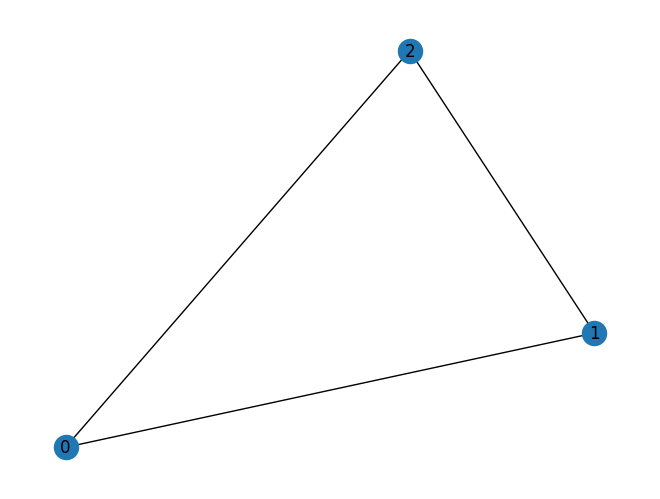

In [115]:
# Draw the graph
nx.draw(G, with_labels = True)

## Node Degree and Neighbors


In [116]:
node_id = 1

# Degree of node 1
print("Node {} has degree {}".format(node_id, G.degree[node_id]))

# Get neighbor of node 1
for neighbor in G.neighbors(node_id):
  print("Node {} has neighbor {}".format(node_id, neighbor))

Node 1 has degree 2
Node 1 has neighbor 0
Node 1 has neighbor 2


# 2. Graph Basics 10 points）

Let's go further. We will load a classic graph in network science, the [Karate Club Network](https://en.wikipedia.org/wiki/Zachary%27s_karate_club). Karate Club Network is a graph which describes a social network of 34 members of a karate club and documents links between members who interacted outside the club.We will explore multiple graph statistics for this graph.

## Load the Zachary's karate club network

The [Karate Club Network](https://en.wikipedia.org/wiki/Zachary%27s_karate_club) is a graph which describes a social network of 34 members of a karate club and documents links between members who interacted outside the club.

In [117]:
import networkx as nx

In [118]:
G = nx.karate_club_graph()

# G is an undirected graph
type(G)

networkx.classes.graph.Graph

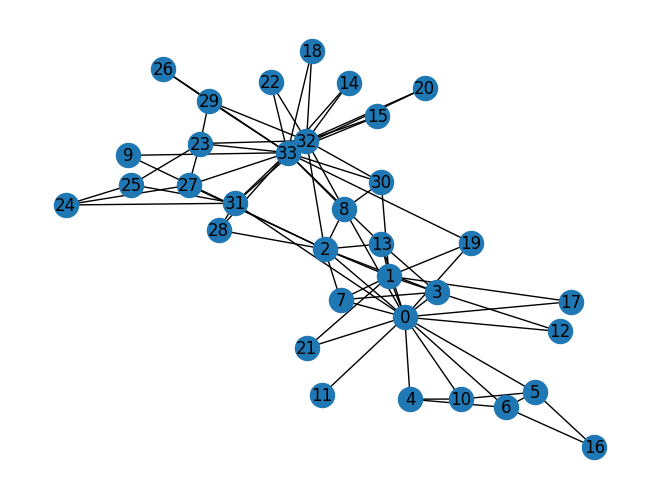

In [119]:
# Visualize the graph
nx.draw(G, with_labels = True)

# 2.1: What is the average degree of the karate club network? (10 Points)

In [120]:
def average_degree(num_edges, num_nodes):
  # TODO: Implement this function that takes number of edges
  # and number of nodes, and returns the average node degree of
  # the graph. Round the result to nearest integer (for example
  # 3.3 will be rounded to 3 and 3.7 will be rounded to 4)

  avg_degree = 0

  ############# Your code here ############
  avg_degree = round(2 * num_edges / num_nodes)
  #########################################

  return avg_degree

num_edges = G.number_of_edges()
num_nodes = G.number_of_nodes()
avg_degree = average_degree(num_edges, num_nodes)
print("Average degree of karate club network is {}".format(avg_degree))

Average degree of karate club network is 5


## 2.2: What is the (raw) closeness centrality for the karate club network node 5? (10 Points)

The equation for closeness centrality is $c(v) = \frac{1}{\sum_{u \neq v}\text{shortest path length between } u \text{ and } v}$

In [121]:
def closeness_centrality(G, node=5):
  # TODO: Implement the function that calculates closeness centrality
  # for a node in karate club network. G is the input karate club
  # network and node is the node id in the graph. Please round the
  # closeness centrality result to 2 decimal places.

  closeness = 0

  ## Note:
  ## 1: You can use networkx closeness centrality function.
  ## 2: Notice that networkx closeness centrality returns the normalized
  ## closeness directly, which is different from the raw (unnormalized)
  ## one that we learned in the lecture.

  closeness = nx.closeness_centrality(G, u=node, wf_improved=False)
  closeness = round(closeness, 2)

  #########################################

  return closeness

node = 5
closeness = closeness_centrality(G, node=node)
print("The node 5 has closeness centrality {}".format(closeness))

The node 5 has closeness centrality 0.38


# 3. Node Classification based on Image Attributes (30 points)

For this question, you can either show your code\&results below or report them in a separate document.


- My code: `Q3.py`
- Training script: `Q3_qiantan.sh`

**(1)** FNNs for image classification.

Test Acc: 0.1052

**(2)** CNNs for image classification.

Test Acc: 0.1586

**(3)** LSTM for image classification.

Test Acc: 0.0990

# 4. Network embedding (55 points)

In this assignment, we are going to intensify your practice with network embedding models, specifically, we need to implement the Node2Vec model using the gensim.Word2Vec model.

## Node2Vec Implementation (25 points)

For more information about Node2Vec and the parameters q and p, see the course slides.

In [123]:
# we need to install the following packages
import numba
import numpy as np
import scipy.sparse as sp
from gensim.models import Word2Vec
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import normalize
from sklearn.metrics import accuracy_score

from tqdm import tqdm

In [124]:
def node2vec(adj, embedding_dim=64, walk_length=30, walks_per_node=10,
                  workers=8, window_size=10, num_neg_samples=1, p=4, q=1):
    """
    parameters
    -------------
    adj : adjacency matrix
    embedding_dim : hidden dimension
    walk_length : maximu length of random walks
    walks_per_node : total number of walks generated for each node
    workers: Number of threads
    window_size: window size to estimate cooccurrence
    num_neg_samples : the number of negative samples
    p: parameter p
    q: parameter q
    """
    walks = sample_n2v_random_walks(adj, walk_length, walks_per_node, p=p, q=q) # extract important information (cooccurence) based on random walks
    walks = [list(map(str, walk)) for walk in walks]
    model = Word2Vec(walks, vector_size=embedding_dim,
                     negative=num_neg_samples, compute_loss=True)
    embedding = model.wv.vectors[np.fromiter(map(int, model.wv.index_to_key), np.int32).argsort()]
    return embedding

def sample_n2v_random_walks(adj, walk_length, walks_per_node, p, q):
    """
    Return type
    -------
    walks : np.ndarray, shape [num_walks * num_nodes, walk_length]
    """
    adj = sp.csr_matrix(adj)
    random_walks = _n2v_random_walk(adj.indptr,
                                    adj.indices,
                                    walk_length,
                                    walks_per_node,
                                    p,
                                    q)
    return random_walks

In [125]:
def _n2v_random_walk(indptr,
                    indices,
                    walk_length,
                    walks_per_node,
                    p,
                    q):
    N = len(indptr) - 1 # node size
    final_walks = [] # array for all walks
    for _ in range(walks_per_node):
        for n in range(N):
            walk = [n]

            ######################################
            curr_node = n
            for _ in range(walk_length-1):
                neighbors = indices[indptr[curr_node]:indptr[curr_node+1]]

                if len(neighbors) == 0:
                    # print(f"Node {curr_node} has no neighbors, walk skipped")
                    walk = walk * walk_length # for isolated nodes, the only next node in a walk is itself
                    break

                # get the next node
                if len(walk) > 1: 
                    prev_node = walk[-2]
                    transition_probs = []
                    
                    for neighbor in neighbors:
                        if neighbor == prev_node:
                            transition_probs.append(1/p)
                        elif neighbor in walk:
                            transition_probs.append(1)
                        else:
                            transition_probs.append(1/q)
                    
                    transition_probs = np.array(transition_probs)
                    transition_probs = transition_probs / transition_probs.sum() # normalize
                    next_node = np.random.choice(neighbors, p=transition_probs)
                else:
                    next_node = np.random.choice(neighbors)
        
                walk.append(next_node)
                curr_node = next_node
            
            ######################################

            final_walks.append(walk)
    return np.array(final_walks)


In [126]:
@numba.jit(nopython=True)
def random_choice(arr, p):
    """
    parameter
    ----------
    arr : 1-D array
    p : the sampling probability

    Return
    -------
    samples : the sampled values
    """
    return arr[np.searchsorted(np.cumsum(p), np.random.random(), side="right")]

## Train and Evaluate (20 points)

In [127]:
import torch 
graph = torch.load("data/Movies.pt", weights_only=False) # create a "Movies" folder and download the Movies dataset from the google drive. 
adj = graph['adj']
label = graph['label']
train_index = graph['train']
val_index = graph['val']
test_index = graph['test']

In [128]:
embedding = node2vec(adj, embedding_dim=64, p=0.5, q=0.5)
embedding.shape

(5146, 64)

In [129]:
# You can use scikit-learn package (e.g., LogisticRegression) in this part
def evaluate_node_classification(embedding_matrix, labels, train_idx, val_idx,
                                 test_idx, normalize_embedding=True, max_iter=1000):

    """ Train a linear model (e.g., a fnn model) to predict the label of a node

    Return
    ----
    preds: the predicted labels by the model
    test_acc: the test accuracy 
    """
    ######################################
    if normalize_embedding:
         embedding_matrix = normalize(embedding_matrix, axis=1)
    
    X_train = embedding_matrix[train_idx]
    y_train = labels[train_idx]

    X_val = embedding_matrix[val_idx]
    y_val = labels[val_idx]

    X_test = embedding_matrix[test_idx]
    y_test = labels[test_idx]

    model = LogisticRegression(max_iter=max_iter)
    model.fit(X_train, y_train)

    preds = model.predict(X_test)
    test_acc = accuracy_score(y_test, preds)


    ######################################
    return preds, test_acc

In [130]:
preds, test_acc = evaluate_node_classification(embedding, label, train_index, val_index, test_index)
print('Test Acc: %.4f' % test_acc)

Test Acc: 0.1790


## Hyper-parameter tuning (10 points)

DeepWalk is a special case of Node2Vec by setting p=q=1. How do p and q affect Node2Vec? Explore more configurations of them and show your results using figure.

In [131]:
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
from itertools import product

In [133]:
p_values = [0.5, 1.0, 1.5, 2.0]
q_values = [0.5, 1.0, 1.5, 2.0]

results = {}

for p, q in tqdm(product(p_values, q_values), total=len(p_values)*len(q_values)):
    embedding = node2vec(adj, embedding_dim=64, p=p, q=q)
    preds, test_acc = evaluate_node_classification(embedding, label, train_index, val_index, test_index)
    results[(p, q)] = test_acc

acc_matrix = np.array([[results[(p, q)] for q in q_values] for p in p_values])

100%|██████████| 16/16 [05:04<00:00, 19.01s/it]


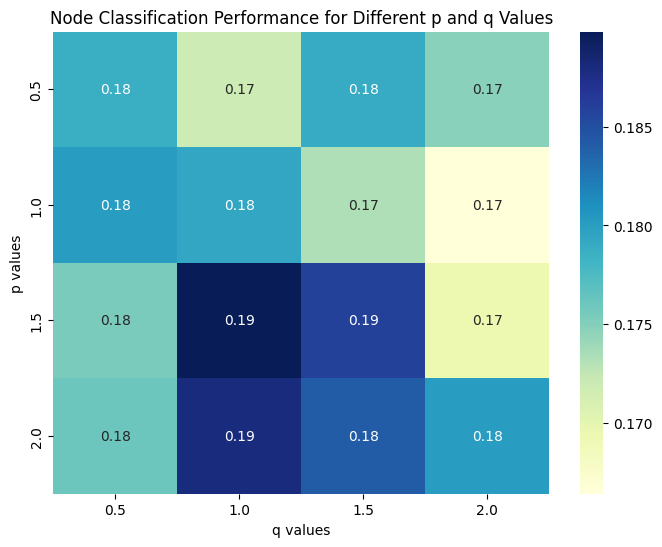

In [134]:
plt.figure(figsize=(8, 6))
sns.heatmap(acc_matrix, annot=True, cmap='YlGnBu', xticklabels=q_values, yticklabels=p_values)


# Add labels and title
plt.xlabel('q values')
plt.ylabel('p values')
plt.title('Node Classification Performance for Different p and q Values')

plt.show()